In [17]:
from mlwpy import *
from sklearn import datasets
from sklearn.neighbors import DistanceMetric as DM
%matplotlib inline

### 3.2 Iris Classification Dataset

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data,
                      columns=iris.feature_names)

iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                  iris_df.tail(3)]))

sepal length (cm)     sepal width (cm)    petal length (cm)  \
0                 5.1000               3.5000               1.4000   
1                 4.9000               3.0000               1.4000   
2                 4.7000               3.2000               1.3000   
147               6.5000               3.0000               5.2000   
148               6.2000               3.4000               5.4000   
149               5.9000               3.0000               5.1000   

        petal width (cm)  target  
0                 0.2000       0  
1                 0.2000       0  
2                 0.2000       0  
147               2.0000       2  
148               2.3000       2  
149               1.8000       2

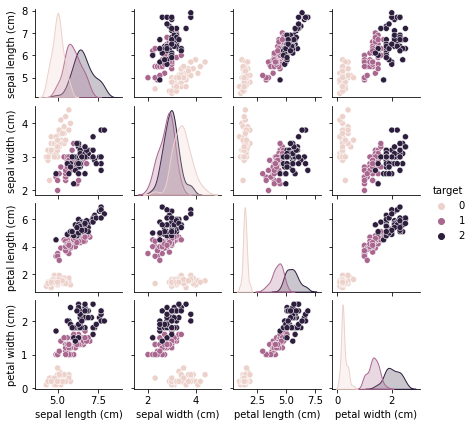

In [4]:
sns.pairplot(iris_df, hue='target', size=1.5);

In [8]:
print('targets: {}'.format(iris.target_names),
     iris.target_names[0], sep='\n')

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [29]:
#simple train-test split
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                      iris.target,
                                                      test_size=.18)

print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:", iris_test_ftrs.shape)

Train features shape: (123, 4)
Test features shape: (27, 4)


### 3.4 Evaluation

In [30]:
answer_key = np.array([True, True, False, True])
student_answers = np.array([True, True, True, True])

correct = answer_key == student_answers
num_correct = correct.sum() #True == 1, add them up
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.75


In [31]:
print("sklearn accuracy:",
     metrics.accuracy_score(answer_key,
                           student_answers))

sklearn accuracy: 0.75


In [32]:
DM

sklearn.neighbors._dist_metrics.DistanceMetric

### 3.5 k-NN Classification Model

In [33]:
#default n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

#evaluate our predictions against the held-back testing targets
print("3NN accuracy:",
     metrics.accuracy_score(iris_test_tgt, preds))

3NN accuracy: 0.9629629629629629


### 3.6 Naive Bayes Classifier

In [34]:
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

#evaluate our predictions against the held-back testing targets
print("NB accuracy:",
     metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 0.9259259259259259


In [40]:
from sklearn import (datasets, metrics,
                    model_selection as skms,
                    naive_bayes, neighbors)

#we set random_state so the results are reproductible
#otherwise, we get different training and testing sets
#more details in Chapter 5
iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                      iris.target,
                                                      test_size =.90,
                                                      random_state=42)

models = {'kNN': neighbors.KNeighborsClassifier(n_neighbors=3),
         'NB': naive_bayes.GaussianNB()}

for name, model in models.items():
    fit = model.fit(iris_train_ftrs, iris_train_tgt)
    preds = fit.predict(iris_test_ftrs)
    
    score = metrics.accuracy_score(iris_test_tgt, preds)
    print("{:>s}: {:0.2f}".format(name,score))

kNN: 0.96
NB: 0.81


In [44]:
%timeit -r1 datasets.load_iris()

1.39 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [49]:
%%timeit -r1 -n1
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                      iris.target,
                                                      test_size =.90,
                                                      random_state=42)

2.92 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [50]:
%%timeit -r1

nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)


1.55 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [51]:
%%timeit -r1

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

7.25 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [52]:
#fitting
nb = naive_bayes.GaussianNB()
%timeit -r1 fit = nb.fit(iris_train_ftrs, iris_train_tgt)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
%timeit -r1 fit = knn.fit(iris_train_ftrs, iris_train_tgt)

920 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
438 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [53]:
#predicting
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

267 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
6.09 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [54]:
%load_ext memory_profiler

In [55]:
%%memit

nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

peak memory: 178.39 MiB, increment: 0.07 MiB


In [56]:
%%memit

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

peak memory: 178.39 MiB, increment: 0.00 MiB


In [91]:
!cat scripts/knn_memtest.py

import memory_profiler, sys
from mlwpy import *


@memory_profiler.profile(precision=4)
def knn_memtest(train, train_tgt, test):
    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    fit = knn.fit(train, train_tgt)
    preds = fit.predict(test)


if __name__ == '__main__':
    iris = datasets.load_iris()
    tts = skms.train_test_split(iris.data, iris.target, test_size=.25)

(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = tts

tup = (iris_train_ftrs, iris_train_tgt, iris_test_ftrs)
knn_memtest(*tup)


In [93]:
!python scripts/knn_memtest.py

Filename: /Users/christinagomez/ml_learning/scripts/knn_memtest.py

Line #    Mem usage    Increment  Occurences   Line Contents
     5 149.8750 MiB 149.8750 MiB           1   @memory_profiler.profile(precision=4)
     6                                         def knn_memtest(train, train_tgt, test):
     7 149.8750 MiB   0.0000 MiB           1       knn = neighbors.KNeighborsClassifier(n_neighbors=3)
     8 150.0312 MiB   0.1562 MiB           1       fit = knn.fit(train, train_tgt)
     9 150.1328 MiB   0.1016 MiB           1       preds = fit.predict(test)




In [94]:
import functools as ft
import memory_profiler
from mlwpy import *


def nb_go(train_ftrs, test_ftrs, train_tgt):
    nb = naive_bayes.GaussianNB()
    fit = nb.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)


def split_data(dataset):
    split = skms.train_test_split(dataset.data, 
                                  dataset.target, 
                                  test_size=.15)
    return split[:-1]  #don't want test tgt


def msr_mem(go, args):
    base = memory_profiler.memory_usage()[0]
    mu = memory_profiler.memory_usage((go, args), 
                                      max_usage=False)[0]
    print("{:<3}: ~{:.4f} MiB".format(go.__name__, mu-base))


if __name__ == "__main__":
    msr_mem(nb_go, split_data(datasets.load_iris()))

nb_go: ~2.8711 MiB


In [95]:
!python scripts/perf_01.py mem nb
!python scripts/perf_01.py time nb

nb_go: ~-0.1172 MiB
nb_go : ~0.1003 sec


In [96]:
!python scripts/perf_01.py mem knn
!python scripts/perf_01.py time knn

knn_go: ~0.5430 MiB
knn_go: ~0.2451 sec


### Wine Dataset

In [81]:
wine = datasets.load_wine()

wine_df = pd.DataFrame(wine.data,
                      columns=wine.feature_names)

wine_df['target'] = wine.target
display(pd.concat([wine_df.head(3),
                  wine_df.tail(3)]))

alcohol           malic_acid                  ash  \
0                14.2300               1.7100               2.4300   
1                13.2000               1.7800               2.1400   
2                13.1600               2.3600               2.6700   
175              13.2700               4.2800               2.2600   
176              13.1700               2.5900               2.3700   
177              14.1300               4.1000               2.7400   

       alcalinity_of_ash            magnesium        total_phenols  \
0                15.6000             127.0000               2.8000   
1                11.2000             100.0000               2.6500   
2                18.6000             101.0000               2.8000   
175              20.0000             120.0000               1.5900   
176              20.0000             120.0000               1.6500   
177              24.5000              96.0000               2.0500   

              flavanoids  nonflavanoid_phenols      proanthocyanins  \
0                 3.0600                0.2800               2.2900   
1                 2.7600                0.2600               1.2800   
2                 3.2400                0.3000               2.8100   
175               0.6900                0.4300               1.3500   
176               0.6800                0.5300               1.4600   
177               0.7600                0.5600               1.3500   

         color_intensity                  hue  od280/od315_of_diluted_wines  \
0                 5.6400               1.0400                        3.9200   
1                 4.3800               1.0500                        3.4000   
2                 5.6800               1.0300                        3.1700   
175              10.2000               0.5900                        1.5600   
176               9.3000               0.6000                        1.6200   
177               9.2000               0.6100                        1.6000   

                 proline  target  
0             1,065.0000       0  
1             1,050.0000       0  
2             1,185.0000       0  
175             835.0000       2  
176             840.0000       2  
177             560.0000       2

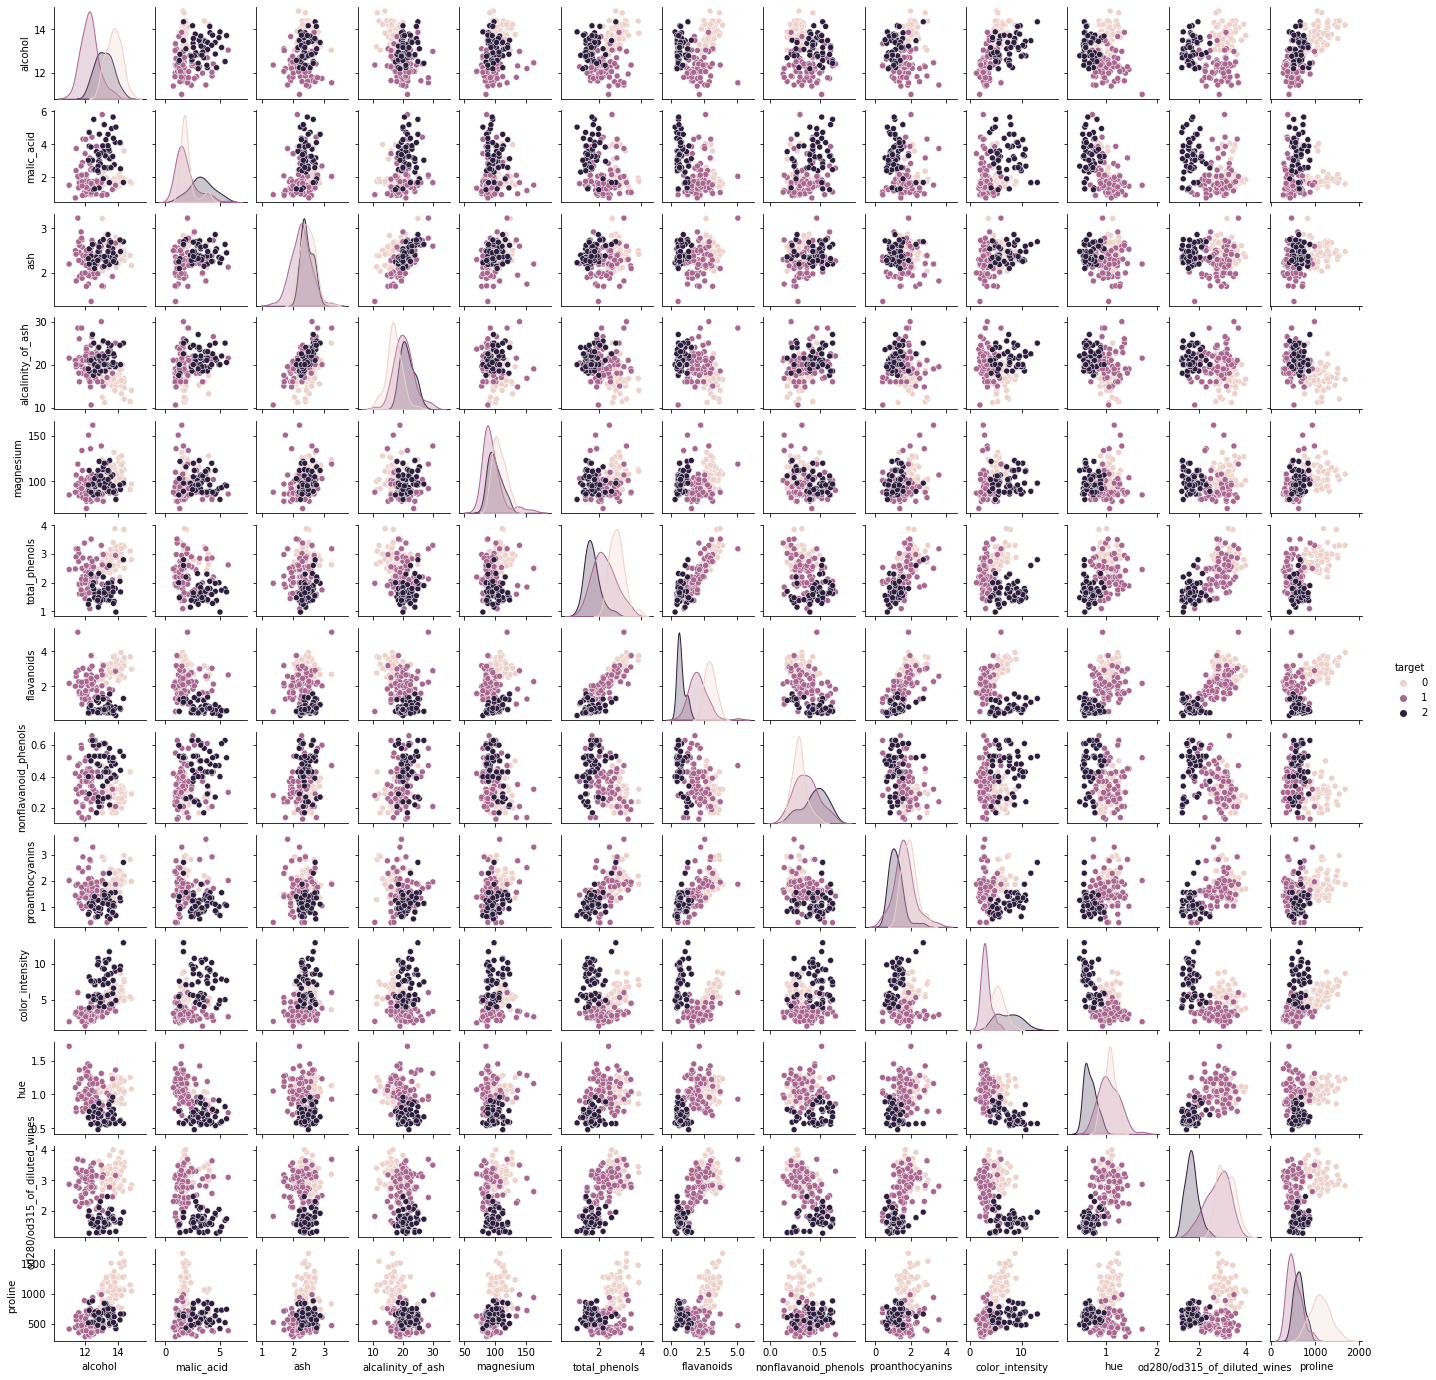

In [82]:
sns.pairplot(wine_df, hue='target', size=1.5);

In [83]:

(wine_train_ftrs, wine_test_ftrs,
wine_train_tgt, wine_test_tgt) = skms.train_test_split(wine.data,
                                                      wine.target,
                                                      test_size =.25,
                                                      random_state=42)

models = {'kNN': neighbors.KNeighborsClassifier(n_neighbors=3),
         'NB': naive_bayes.GaussianNB()}

for name, model in models.items():
    fit = model.fit(wine_train_ftrs, wine_train_tgt)
    preds = fit.predict(wine_test_ftrs)
    
    score = metrics.accuracy_score(wine_test_tgt, preds)
    print("{:>s}: {:0.2f}".format(name,score))

kNN: 0.76
NB: 1.00


### Breast Cancer Dataset

In [89]:
cancer = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data,
                      columns=cancer.feature_names)

cancer_df['target'] = cancer.target
display(pd.concat([cancer_df.head(3),
                  cancer_df.tail(3)]))

mean radius         mean texture       mean perimeter  \
0                17.9900              10.3800             122.8000   
1                20.5700              17.7700             132.9000   
2                19.6900              21.2500             130.0000   
566              16.6000              28.0800             108.3000   
567              20.6000              29.3300             140.1000   
568               7.7600              24.5400              47.9200   

               mean area      mean smoothness     mean compactness  \
0             1,001.0000               0.1184               0.2776   
1             1,326.0000               0.0847               0.0786   
2             1,203.0000               0.1096               0.1599   
566             858.1000               0.0846               0.1023   
567           1,265.0000               0.1178               0.2770   
568             181.0000               0.0526               0.0436   

          mean concavity  mean concave points        mean symmetry  \
0                 0.3001               0.1471               0.2419   
1                 0.0869               0.0702               0.1812   
2                 0.1974               0.1279               0.2069   
566               0.0925               0.0530               0.1590   
567               0.3514               0.1520               0.2397   
568               0.0000               0.0000               0.1587   

     mean fractal dimension  ...        worst texture      worst perimeter  \
0                    0.0787  ...              17.3300             184.6000   
1                    0.0567  ...              23.4100             158.8000   
2                    0.0600  ...              25.5300             152.5000   
566                  0.0565  ...              34.1200             126.7000   
567                  0.0702  ...              39.4200             184.6000   
568                  0.0588  ...              30.3700              59.1600   

              worst area     worst smoothness    worst compactness  \
0             2,019.0000               0.1622               0.6656   
1             1,956.0000               0.1238               0.1866   
2             1,709.0000               0.1444               0.4245   
566           1,124.0000               0.1139               0.3094   
567           1,821.0000               0.1650               0.8681   
568             268.6000               0.0900               0.0644   

         worst concavity  worst concave points       worst symmetry  \
0                 0.7119                0.2654               0.4601   
1                 0.2416                0.1860               0.2750   
2                 0.4504                0.2430               0.3613   
566               0.3403                0.1418               0.2218   
567               0.9387                0.2650               0.4087   
568               0.0000                0.0000               0.2871   

     worst fractal dimension  target  
0                     0.1189       0  
1                     0.0890       0  
2                     0.0876       0  
566                   0.0782       0  
567                   0.1240       0  
568                   0.0704       1  

[6 rows x 31 columns]

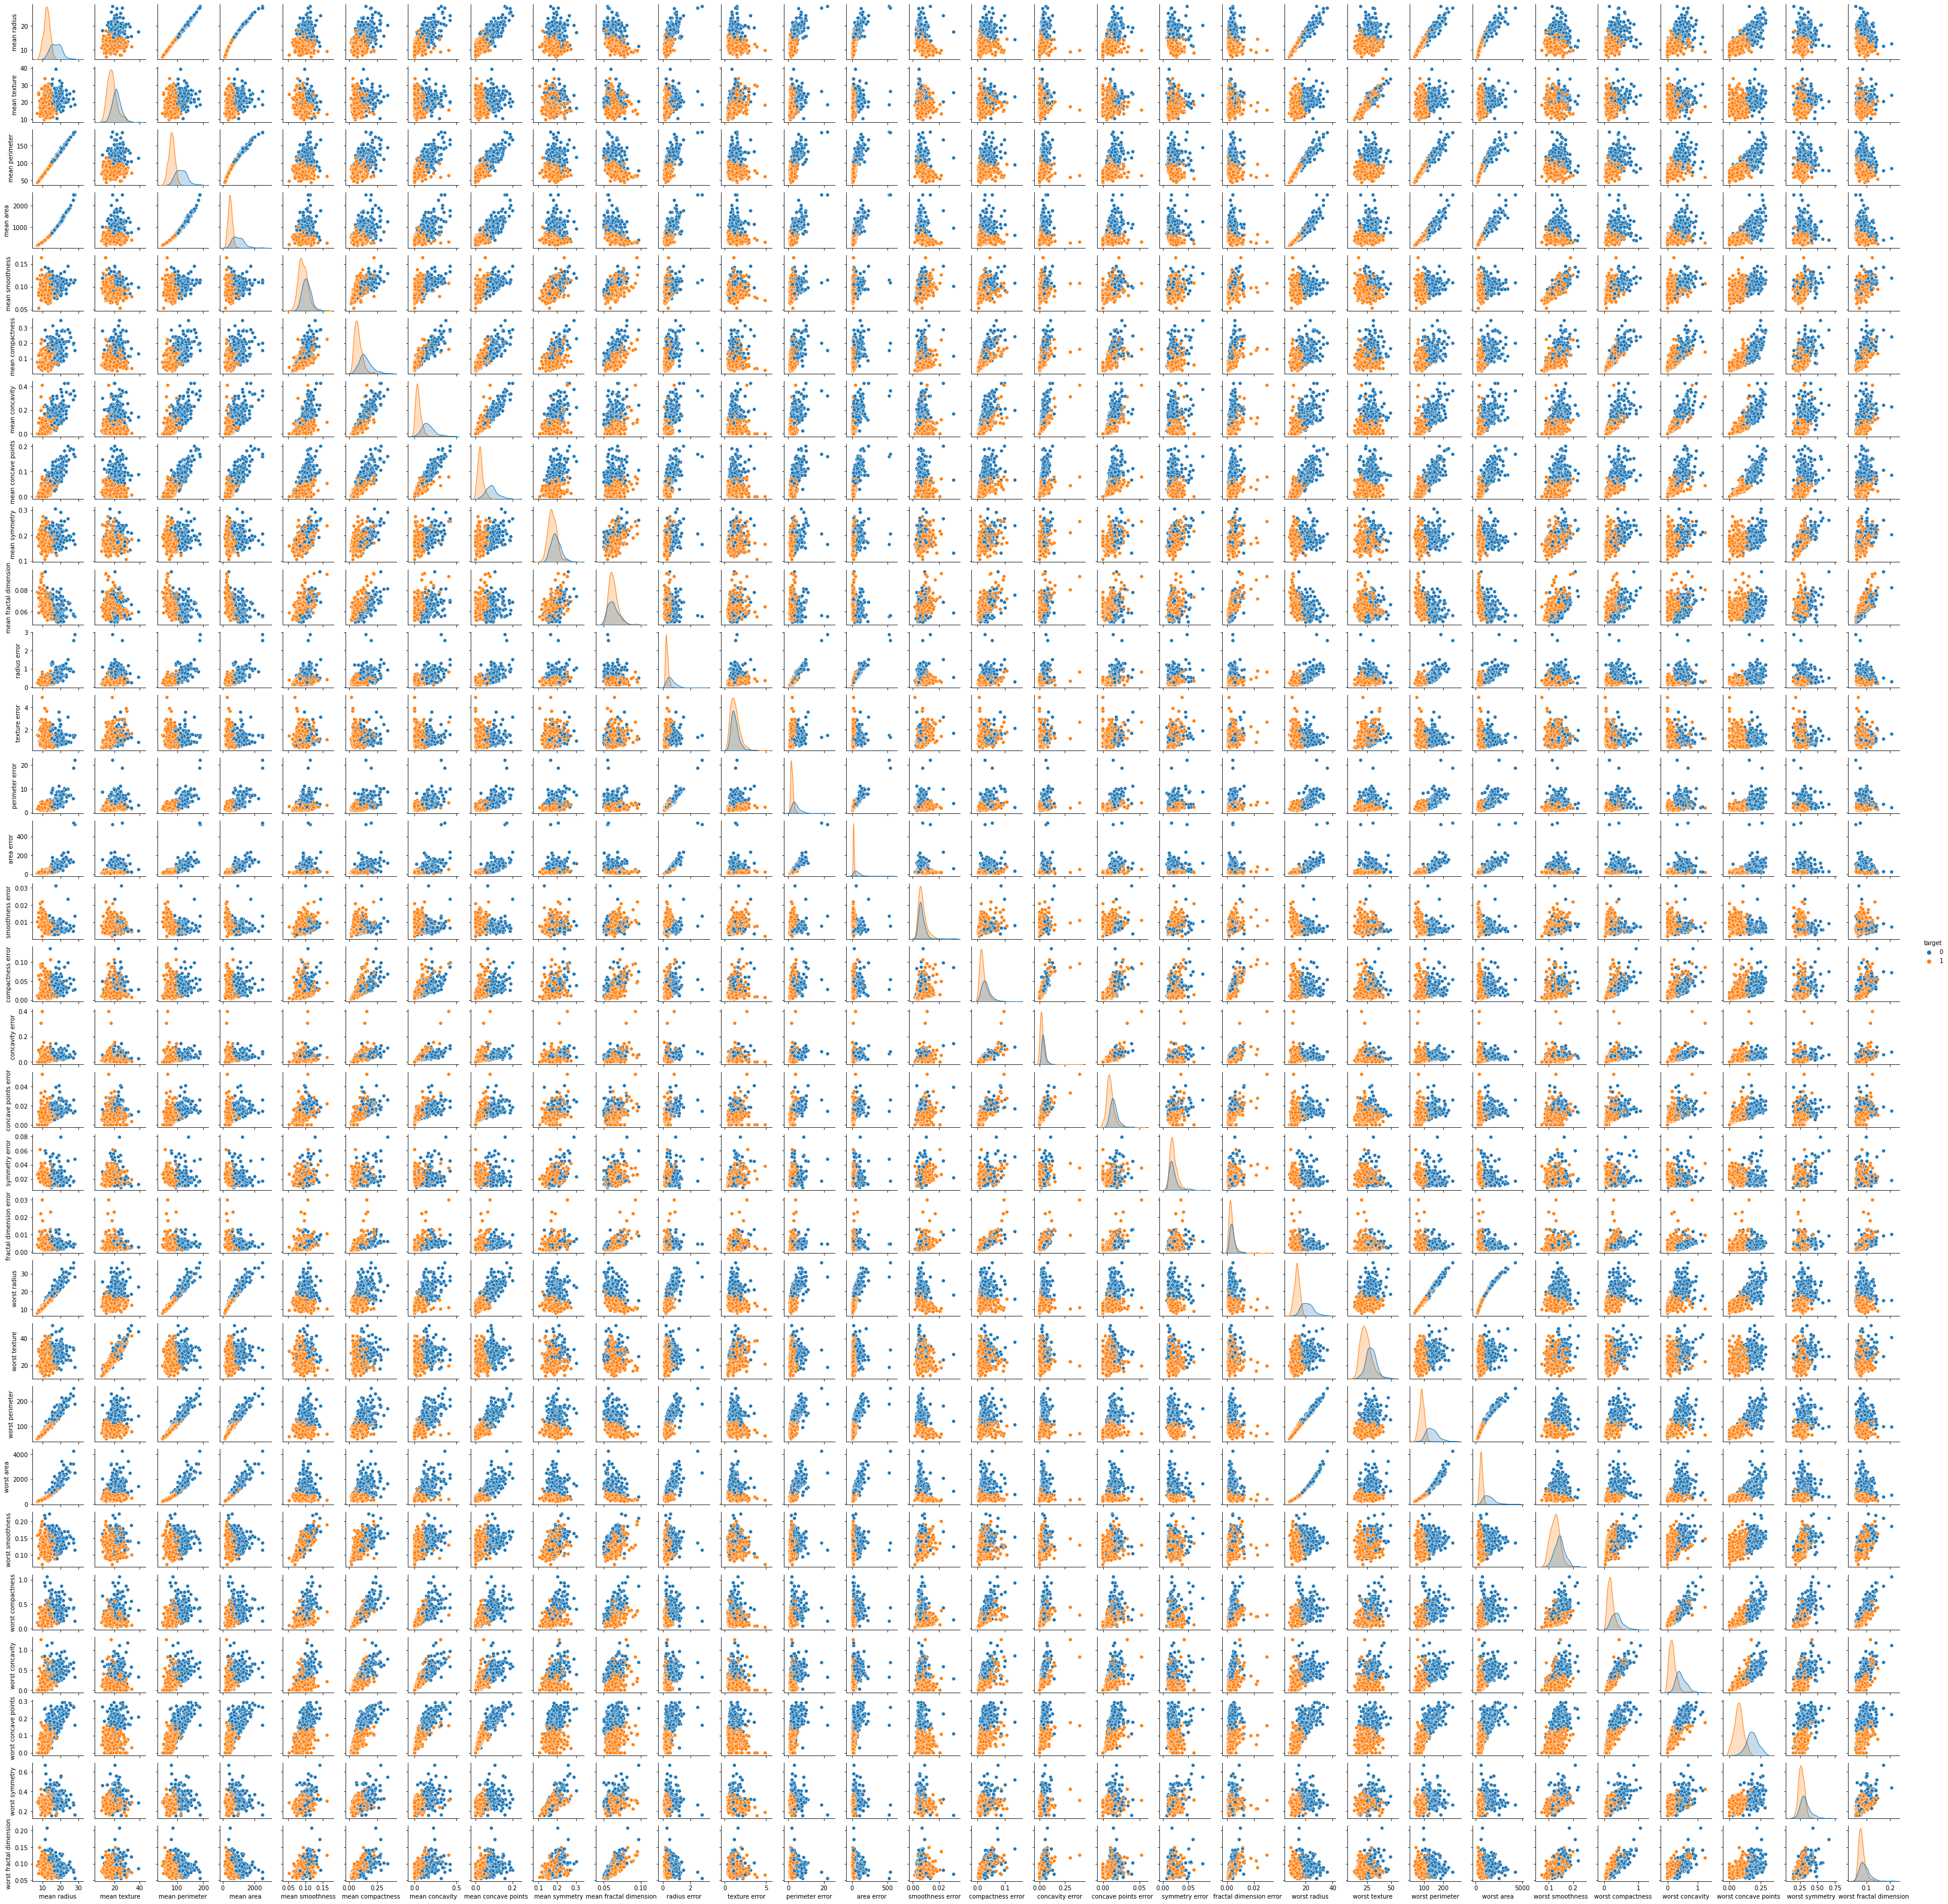

In [90]:
sns.pairplot(cancer_df, hue='target', size=1.5);